<a href="https://colab.research.google.com/github/thanusree02/Natural-Language-Processing/blob/main/NLP_LAB_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
!pip install gensim
from gensim.models import KeyedVectors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 65.3 MB/s eta 0:00:00


Load Embedding Model

In [4]:
import gensim.downloader as api
from gensim.models import KeyedVectors

# Example: Load Google Word2Vec pre-trained model
# Download the model directly using gensim's API
model = api.load("word2vec-google-news-300")

# Print vocabulary size
print("Vocabulary Size:", len(model.key_to_index))

# Display vector for a sample word
word = "king"
print(f"\nVector for '{word}':\n", model[word])
print("\nVector Dimension:", len(model[word]))

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Vocabulary Size: 3000000

Vector for 'king':
 [ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  2.01

Select Word List

In [5]:
words = [
    # Family & Gender
    "man", "woman", "king", "queen", "boy", "girl",
    "father", "mother", "brother", "sister",

    # Countries & Capitals
    "france", "paris", "india", "delhi",
    "japan", "tokyo", "germany", "berlin",

    # Professions
    "teacher", "doctor", "engineer", "nurse",
    "lawyer", "student",

    # Places
    "school", "hospital", "office",
    "university", "city", "village",

    # Animals
    "dog", "cat", "lion", "tiger", "elephant",

    # Technology
    "computer", "internet", "software",
    "data", "network"
]


Extract Corresponding Vectors

In [6]:
vectors = []

for word in words:
    if word in model:
        vectors.append(model[word])
    else:
        print(f"{word} not found in vocabulary")

vectors = np.array(vectors)

print("Number of words selected:", len(vectors))
print("Shape of vector matrix:", vectors.shape)


Number of words selected: 40
Shape of vector matrix: (40, 300)


Apply t-SNE (Dimensionality Reduction)

In [7]:
from sklearn.manifold import TSNE

# Initialize t-SNE model
tsne = TSNE(n_components=2, random_state=42, perplexity=5)

# Reduce dimensions
reduced_vectors = tsne.fit_transform(vectors)

# Check shape of output
print("Original Shape:", vectors.shape)
print("Reduced Shape:", reduced_vectors.shape)


Original Shape: (40, 300)
Reduced Shape: (40, 2)


Plot Visualization

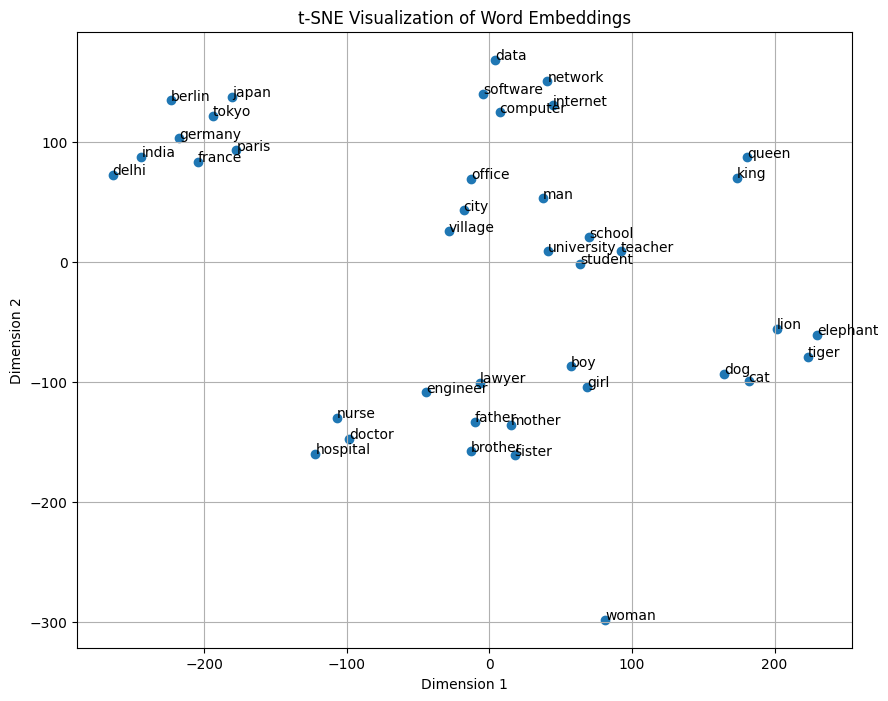

In [9]:
import matplotlib.pyplot as plt

x_coords = reduced_vectors[:, 0]
y_coords = reduced_vectors[:, 1]

plt.figure(figsize=(10, 8))

# Scatter plot
plt.scatter(x_coords, y_coords)

# Annotate each word
for i, word in enumerate(words):
    plt.annotate(word, (x_coords[i], y_coords[i]))

plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()

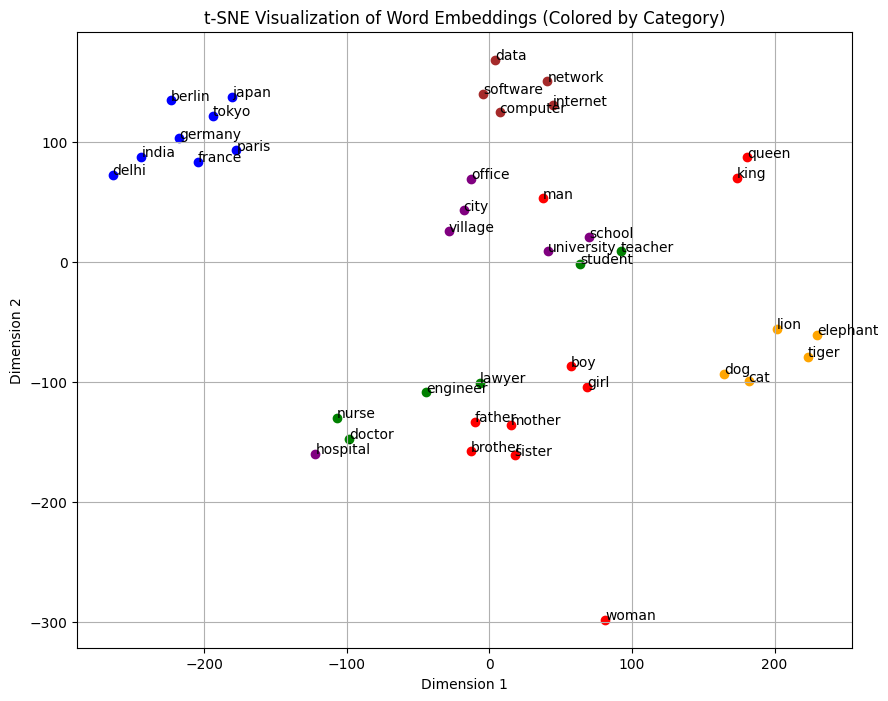

In [10]:
# Define categories
categories = {
    "family": ["man","woman","king","queen","boy","girl","father","mother","brother","sister"],
    "countries": ["france","paris","india","delhi","japan","tokyo","germany","berlin"],
    "professions": ["teacher","doctor","engineer","nurse","lawyer","student"],
    "places": ["school","hospital","office","university","city","village"],
    "animals": ["dog","cat","lion","tiger","elephant"],
    "technology": ["computer","internet","software","data","network"]
}

colors = {
    "family": "red",
    "countries": "blue",
    "professions": "green",
    "places": "purple",
    "animals": "orange",
    "technology": "brown"
}

plt.figure(figsize=(10, 8))

for i, word in enumerate(words):
    for category, word_list in categories.items():
        if word in word_list:
            plt.scatter(x_coords[i], y_coords[i], color=colors[category])
            plt.annotate(word, (x_coords[i], y_coords[i]))

plt.title("t-SNE Visualization of Word Embeddings (Colored by Category)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()
